**change runtime to t4 gpu** // Under Harware Accelerator!:)

Configuring our secrets

In [ ]:
import os
import sys

if "google.colab" in sys.modules:
    from google.colab import userdata
    os.environ['HF_TOKEN'] = userdata.get("HF_TOKEN")

if "HF_TOKEN" not in os.environ:
    raise EnvironmentError(
        "The Hugging Face token (HF_TOKEN) could not be found in the "
        "environment variables. This token is required to download the Gemma "
        "models from the Hugging Face Hub. For more information about "
        "HF User Access tokens, please refer to the HF documentation "
        "here: https://huggingface.co/docs/hub/en/security-tokens."
    )



# **Synthetic data generation with Gemma 3**

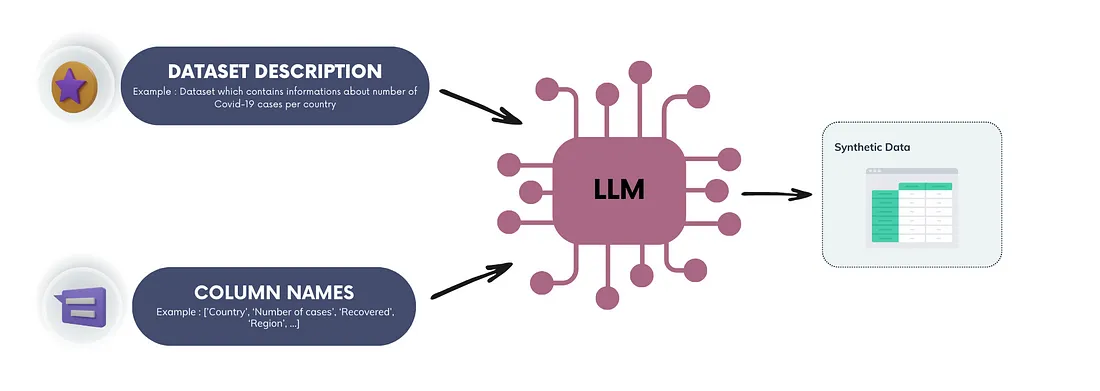
## What's distilabel?

Distilabel is a framework designed for generating synthetic data and AI feedback, tailored for engineers working on scalable, reliable pipelines based on verified research. It supports a variety of use cases, including traditional NLP tasks like classification and extraction, as well as generative scenarios like instruction following and dialogue generation. With its programmatic approach, Distilabel accelerates AI development by enabling the rapid creation of high-quality, diverse datasets.

In [ ]:

!pip install -q distilabel==1.4.2

### Initializing **Gemma 2** **model**

In this example, we don't need to initialize Gemma ourselves; this is handled by distilabel within the pipeline. The good news is that distilabel is fully compatible with Hugging Face Model Hub, so it will retrieve the model directly! There's no need to set up the model or tokenizer manually

In [ ]:
model_name = "google/gemma-2-2b-it"


In [ ]:
model_name= "google/gemma-3-27b-it"

Basic example

In this example, you'll see how to use Gemma on a very small dataset used by distilabel for testing. It contains only 10 rows of data, as shown below. The dataset can be explored here.

In [ ]:
import json
import pandas as pd
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromHub, LoadDataFromDicts, LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration

In [ ]:
with Pipeline() as simple_pipeline:
    load_data = LoadDataFromHub(
        output_mappings={"prompt": "instruction"}
    )
    text_generation = TextGeneration(
        llm=TransformersLLM(model=model_name)
    )
    load_data >> text_generation

In [ ]:

# Display the output dataset as Pandas DF
pd.DataFrame(simple_pipeline_output["default"]["train"])

,instruction,completion,meta,generation,distilabel_metadata,model_name
0,Arianna has 12 chocolates more than Danny. Dan...,Denote the number of chocolates each person ha...,"{'category': 'Question Answering', 'completion...",Here's how to solve this problem step-by-step:...,{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it
1,Write a plot summary for a comedic novel invol...,Elon Musk hires a team of experts to build the...,"{'category': 'Generation', 'completion': 'Elon...",## The SpaceX Seafaring Saga: A Novel\n\n**Log...,{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it
2,Create a 3 turn conversation between a custome...,Clerk: How are you doing today?\nCustomer: Gre...,"{'category': 'Summarization', 'completion': 'C...",## Grocery Store Conversation\n\n**Customer:**...,{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it
3,Write a poem about the sun and moon.,"The sun and the moon, the guards from the sky\...","{'category': 'Generation', 'completion': 'The ...","The Sun, a fiery orb of gold,\nA blazing heart...",{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it
4,Does Searle believe that AI can think? Explain...,"No, Searle does not believe that AI can think....","{'category': 'Commonsense/logic', 'completion'...","Yes, Searle believes that AI cannot truly ""thi...",{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it
5,Tell me what the following code does\r\n\r\nim...,"In short, the code reads in a CSV file contain...","{'category': 'Natural language to code', 'comp...",This Python code snippet reads data from a CSV...,{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it
6,Can you find and correct any logical errors in...,The original code counts the number of lowerca...,"{'category': 'Natural language to code', 'comp...",The provided code is actually correct for coun...,{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it
7,I need you to write a resignation letter to my...,"Hi Albert,\nPlease accept this letter as forma...","{'category': 'Brainstorm', 'completion': 'Hi A...","[Your Address]\n[City, State, Zip Code]\n[Emai...",{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it
8,Joe Biden is the Nth president of the United S...,46,"{'category': 'Commonsense/logic', 'completion'...",Joe Biden is the **46th** president of the Uni...,{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it
9,Write a four-sentence horror story about sleep...,I woke up at 7 am after having nightmares the ...,"{'category': 'Generation', 'completion': 'I wo...","The clock ticked, each second echoing in the s...",{'raw_input_text_generation_0': [{'content': '...,google/gemma-2-2b-it


# **Creating Custom Data Sets**

In [ ]:
from typing import List

def prepare_credit_history_prompt(count: int = 10):
    prompt = f"""Generate {count} realistic credit history records in JSON format.
        Each record should include:
        - applicant_name (string)
        - ssn (string, format: XXX-XX-XXXX)
        - dob (string, format: YYYY-MM-DD)
        - credit_score (integer, range: 600-850)
        - history_length (integer, range: 1-20)
        - payment_history (object with on_time and late_payments)
        - credit_utilization (float, range: 0.1-0.8)

        Return as a JSON array of objects without any extra text or explanation."""
    return prompt

credit_history_prompt = prepare_credit_history_prompt(count=10)
print(credit_history_prompt)

Generate 10 realistic credit history records in JSON format.
        Each record should include:
        - applicant_name (string)
        - ssn (string, format: XXX-XX-XXXX)
        - dob (string, format: YYYY-MM-DD)
        - credit_score (integer, range: 600-850)
        - history_length (integer, range: 1-20)
        - payment_history (object with on_time and late_payments)
        - credit_utilization (float, range: 0.1-0.8)
        
        Return as a JSON array of objects without any extra text or explanation.


In [ ]:
from typing import List
from IPython.display import display, Markdown, Latex
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration  # Import TextGeneration

def prepare_credit_history_prompt(count: int = 10):
    prompt = f"""Generate {count} realistic credit history records in JSON format.
        Each record should include:
        - applicant_name (string)
        - ssn (string, format: XXX-XX-XXXX)
        - dob (string, format: YYYY-MM-DD)
        - credit_score (integer, range: 600-850)
        - history_length (integer, range: 1-20)
        - payment_history (object with on_time and late_payments)
        - credit_utilization (float, range: 0.1-0.8)

        Return as a JSON array of objects without any extra text or explanation."""
    return prompt

# Assuming 'model_name' is already defined, e.g., "google/gemma-2-2b-it"

credit_history_prompt = prepare_credit_history_prompt(count=10)

# Prepare data for the pipeline
data = [{"instruction": credit_history_prompt}]  # Use the credit history prompt

with Pipeline() as custom_pipeline:
    load_data = LoadDataFromDicts(name="load_data", data=data)
    text_generation = TextGeneration(
        llm=TransformersLLM(
            model=model_name,
            generation_kwargs={"max_new_tokens": 512}  # Adjust as needed
        )
    )
    load_data >> text_generation

custom_output = custom_pipeline.run()

# Extract and display the generated credit history data
credit_history_data = custom_output["default"]["train"][0]["generation"]
print(credit_history_data)  # Print the generated JSON data

[04/05/25 09:26:42] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to                ]8;id=647454;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=648606;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#866\866]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_text_generation_0/20            
                             f1ed8f53124e9d663e7cd3a90e46c439cbbcbb/executions/7d2b3d0bf9f1690e98317906            
                             875b508e18aecfc4/data/steps_outputs'                                                  

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in     ]8;id=307918;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=153131;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#889\889]8;;\
                             stages:                                                                               
                              * Stage 0:                                                                           
                                - 'load_data'                                                                      
                                - 'text_generation_0'                                                              

[04/05/25 09:26:43] INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=875034;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=733861;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1183\1183]8;;\
                             load...                                                                               

[04/05/25 09:26:45] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 1/2                 ]8;id=338098;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=23991;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'load_data' replicas: 1/1                                                          
                              * 'text_generation_0' replicas: 0/1                                                  

Device set to use cuda:0


[04/05/25 09:27:13] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 2/2                 ]8;id=168914;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=682688;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'load_data' replicas: 1/1                                                          
                              * 'text_generation_0' replicas: 1/1                                                  

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=744194;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=229245;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1220\1220]8;;\

                    INFO     ['distilabel.step.load_data'] 🧬 Starting yielding batches from    ]8;id=522967;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=213799;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             generator step 'load_data'. Offset: 0                                                 

                    INFO     ['distilabel.step.load_data'] 📨 Step 'load_data' sending batch 0  ]8;id=818669;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=176163;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             to output queue                                                                       

                    INFO     ['distilabel.step.load_data'] 🏁 Finished running step 'load_data' ]8;id=156866;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=281269;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             (replica ID: 0)                                                                       

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=72776;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=533197;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

[04/05/25 09:27:44] INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=844625;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=991195;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=781692;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=652143;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

Generating train split: 0 examples [00:00, ? examples/s]

```json
[
  {
    "applicant_name": "John Doe",
    "ssn": "456-789-1234",
    "dob": "1990-01-15",
    "credit_score": 730,
    "history_length": 7,
    "payment_history": {
      "on_time": true,
      "late_payments": false
    },
    "credit_utilization": 0.25
  },
  {
    "applicant_name": "Jane Smith",
    "ssn": "123-456-7890",
    "dob": "1985-05-20",
    "credit_score": 680,
    "history_length": 12,
    "payment_history": {
      "on_time": true,
      "late_payments": false
    },
    "credit_utilization": 0.5
  },
  {
    "applicant_name": "Michael Brown",
    "ssn": "987-654-3210",
    "dob": "1995-09-01",
    "credit_score": 780,
    "history_length": 10,
    "payment_history": {
      "on_time": true,
      "late_payments": false
    },
    "credit_utilization": 0.3
  },
  {
    "applicant_name": "Emily Davis",
    "ssn": "543-210-9876",
    "dob": "1988-03-10",
    "credit_score": 650,
    "history_length": 15,
    "payment_history": {
      "on_time": true,
      "late

In [ ]:
from typing import List
from IPython.display import display, Markdown, Latex
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration  # Import TextGeneration

def prepare_credit_history_prompt(count: int = 10):
    prompt = f"""Generate {count} realistic credit history records in JSON format.
        Each record should include:
        - applicant_name (string)
        - ssn (string, format: XXX-XX-XXXX)
        - dob (string, format: YYYY-MM-DD)
        - credit_score (integer, range: 600-850)
        - history_length (integer, range: 1-20)
        - payment_history (object with on_time and late_payments)
        - credit_utilization (float, range: 0.1-0.8)

        Return as a JSON array of objects without any extra text or explanation."""
    return prompt

# Assuming 'model_name' is already defined, e.g., "google/gemma-2-2b-it"

credit_history_prompt = prepare_credit_history_prompt(count=20)

# Prepare data for the pipeline
data = [{"instruction": credit_history_prompt}]  # Use the credit history prompt

with Pipeline() as custom_pipeline:
    load_data = LoadDataFromDicts(name="load_data", data=data)
    text_generation = TextGeneration(
        llm=TransformersLLM(
            model=model_name,
            generation_kwargs={"max_new_tokens": 3012}  # Adjust as needed
        )
    )
    load_data >> text_generation

custom_output = custom_pipeline.run()

# Extract and display the generated credit history data
credit_history_data = custom_output["default"]["train"][0]["generation"]
print(credit_history_data)  # Print the generated JSON data

[04/05/25 09:45:53] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to                ]8;id=655029;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=479861;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#866\866]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_text_generation_0/20            
                             f1ed8f53124e9d663e7cd3a90e46c439cbbcbb/executions/544bcee3f908c5efc232c742            
                             b644e888171e588d/data/steps_outputs'                                                  

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in     ]8;id=731292;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=508312;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#889\889]8;;\
                             stages:                                                                               
                              * Stage 0:                                                                           
                                - 'load_data' (results cached, won't be loaded and executed)                       
                                - 'text_generation_0'                                                              

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=891781;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=293453;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1183\1183]8;;\
                             load...                                                                               

Device set to use cuda:0


[04/05/25 09:46:13] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 1/1                 ]8;id=570876;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=369567;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'text_generation_0' replicas: 1/1                                                  

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=240353;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=869219;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1220\1220]8;;\

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=595955;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=221279;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

[04/05/25 09:47:29] INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=192942;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=891817;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=384203;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=203526;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

Generating train split: 0 examples [00:00, ? examples/s]

```json
[
  {
    "applicant_name": "John Doe",
    "ssn": "456-789-1234",
    "dob": "1990-01-15",
    "credit_score": 730,
    "history_length": 7,
    "payment_history": {
      "on_time": true,
      "late_payments": false
    },
    "credit_utilization": 0.25
  },
  {
    "applicant_name": "Jane Smith",
    "ssn": "123-456-7890",
    "dob": "1985-05-20",
    "credit_score": 680,
    "history_length": 12,
    "payment_history": {
      "on_time": true,
      "late_payments": false
    },
    "credit_utilization": 0.5
  },
  {
    "applicant_name": "Michael Brown",
    "ssn": "987-654-3210",
    "dob": "1995-09-01",
    "credit_score": 780,
    "history_length": 10,
    "payment_history": {
      "on_time": true,
      "late_payments": false
    },
    "credit_utilization": 0.3
  },
  {
    "applicant_name": "Emily Davis",
    "ssn": "543-210-9876",
    "dob": "1988-03-10",
    "credit_score": 650,
    "history_length": 15,
    "payment_history": {
      "on_time": true,
      "late

In [ ]:
from typing import List
from IPython.display import display, Markdown, Latex
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration  # Import TextGeneration

def generate_claims_history_prompt(count: int = 10):
    prompt = f"""Generate {count} realistic insurance claims records in JSON format.
        Each record should include:
        - claim_id (string, format: CLMXXXXX)
        - date (string, ISO format)
        - type (string: collision/comprehensive/liability)
        - amount (float, range: 1000-50000)
        - status (string: paid/closed/pending)

        Return as a JSON array of objects without any extra text or explanation."""
    return prompt

# Assuming 'model_name' is already defined, e.g., "google/gemma-2-2b-it"

claims_history_prompt = generate_claims_history_prompt(count=10)

# Prepare data for the pipeline
data = [{"instruction": claims_history_prompt}]  # Use the credit history prompt

with Pipeline() as custom_pipeline:
    load_data = LoadDataFromDicts(name="load_data", data=data)
    text_generation = TextGeneration(
        llm=TransformersLLM(
            model=model_name,
            generation_kwargs={"max_new_tokens": 512}  # Adjust as needed
        )
    )
    load_data >> text_generation

custom_output = custom_pipeline.run()

# Extract and display the generated credit history data
claims_history_data = custom_output["default"]["train"][0]["generation"]
print(credit_history_data)  # Print the generated JSON data